# Desafio 3 - Distribuições de Probabilidade

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from IPython import get_ipython
#from IPython.core.pylabtools import figsize
#figsize(10, 6)
#sns.set()

In [2]:
 from IPython import get_ipython

from IPython.core.pylabtools import figsize

figsize(10, 6)

sns.set()

## Parte 1

In [3]:
np.random.seed(42)

dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                          "binomial": sct.binom.rvs(100, 0.2, size=10000)})

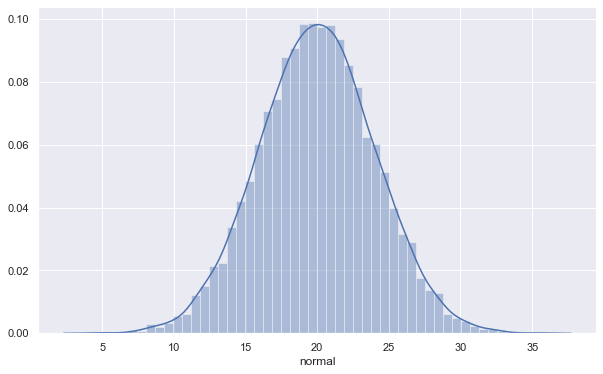

In [4]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe['normal']);

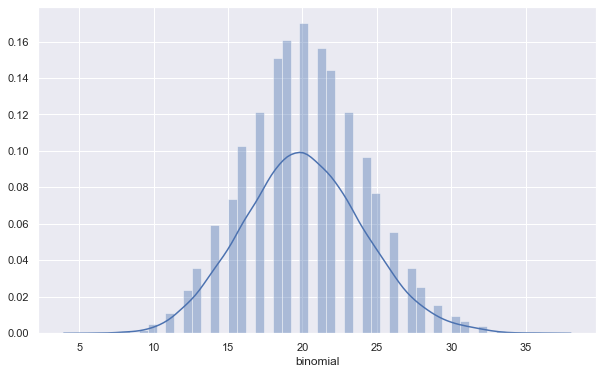

In [5]:
sns.distplot(dataframe['binomial']);

### Questão 1

* **Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.**

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [6]:
def q1():
    qt = dataframe.quantile([0.25, 0.5, 0.75])
    return tuple((qt['normal'] - qt['binomial']).round(3))

Para refletir:

* **Você esperava valores dessa magnitude?**

* **Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?**

A distribuição binomial pode ser aproximada pela normal $$X \sim Bin(n, p) \rightarrow N(n.p, n.p.q)$$ desde que:
* $n.p >= 10;$
* $n.q >= 10.$ 

Considerando que nossa distrubuição binomial apresenta 100 ensaios com probabilidade 0.2, temos:   
* $n=100$
* $p=0.2$, 
* $q=(1-p)=0.8$;
* $n.p = 20$;
* $n.q = 80$.

Portanto, as condições foram satisfeita e **a distribuição binomial pode ser aproximada pela normal, isso explica o fato de distribuições diferentes apresentarem valores semelhantes**.

### Questão 2

* Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. **Qual a  probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`?** Responda como uma único escalar arredondado para três casas decimais.

In [7]:
mean = dataframe['normal'].mean()
std = dataframe['normal'].std()
x1_s1 = mean - std 
x2_s1 = mean + std

In [8]:
def q2():
    return float((ECDF(dataframe['normal'])(x2_s1) - ECDF(dataframe['normal'])(x1_s1)).round(3))

Para refletir:

* **Esse valor se aproxima do esperado teórico?**
* **Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.**

De acordo com a **regra 68-95-99.7**: 
<img src='rule.png' width=500>

Para 1 desvio padrão de distância da média ($\pm \sigma$), o valor esperado teórico é de 68.27, obtemos 68.4.

In [9]:
q2()

0.684

Para 2 desvios padrões de distância ($\pm 2\sigma$), o valor esperado teórico é de 95.45, obtemos 95.4.

In [10]:
x1_s2 = mean - 2*std
x2_s2 = mean + 2*std
(ECDF(dataframe['normal'])(x2_s2) - ECDF(dataframe['normal'])(x1_s2)).round(3)

0.954

Para 3 desvios padrões de distância ($\pm 3\sigma$), o valor esperado teórico é de 99.73, obtemos 99.7.

In [11]:
x1_s3 = mean - 3*std
x2_s3 = mean + 3*std
(ECDF(dataframe['normal'])(x2_s3) - ECDF(dataframe['normal'])(x1_s3)).round(3)   

0.997

Portanto, podemos confirmar que **os valores obtidos se aproximam dos valores teóricos**.

### Questão 3

* **Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.**

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [12]:
df = dataframe.agg(['mean', 'std'])
df['dif'] = df['binomial'] - df['normal']

In [13]:
def q3():
    m = df['dif']['mean'].round(3)
    v = df['dif']['std'].round(3)
    return (m, v)

In [14]:
q3()

(0.106, 0.027)

Para refletir:  

* **Você esperava valor dessa magnitude?**

Como vimos na questão 1, a distribuição binomial em questão pode ser aproximada para normal. Portanto, o valor dessa magnitude era esperado. 


* **Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?**  

Conforme **aumentarmos o tamanho de n, as distribuição tendem a se tornarem mais próximas**. No entanto, **ao diminuirmos n**, mais precisamente para valores abaixo de 50, as condições apresentadas para aproximação não serão satisfeitas, desta forma **as distribuições tendem a se distanciarem**.

## Parte 2

In [15]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

In [16]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


### Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

* **Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.**

In [17]:
false_pulsar_mean_profile = stars[stars['target'] == 0]['mean_profile']
false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/ \
                                         (false_pulsar_mean_profile.std())

In [18]:
quantis = sct.norm.ppf([0.8, 0.9, 0.95])
fecdf = ECDF(false_pulsar_mean_profile_standardized)

In [19]:
def q4():
    prob = [fecdf(q).round(3) for q in quantis]
    return tuple(prob)

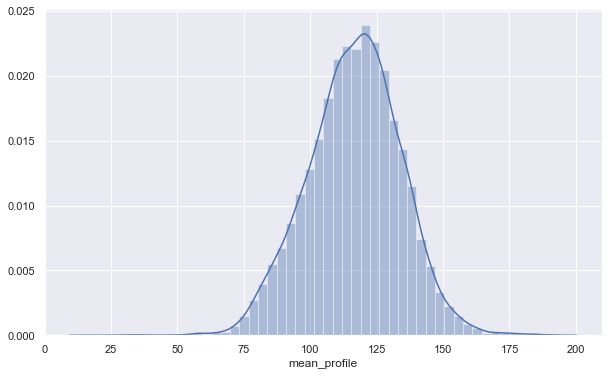

In [20]:
sns.distplot(false_pulsar_mean_profile);

### Questão 5

* **Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.**

In [21]:
def q5():
    normal = sct.norm.ppf([0.25, 0.5, 0.75])
    standardized = false_pulsar_mean_profile_standardized.quantile([0.25, 0.5, 0.75]).to_numpy()
    return tuple((standardized - normal).round(3))

In [22]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* **Os valores encontrados fazem sentido?**
* **O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?**

Através de um **gráfico QQ (Quantile-Quantile) somos capazes de observar o quão próxima uma amostra está da distribuição normal**, os quantis teóricos estão representados no eixo x, enquanto os dados reais estão dispostos ao longo do eixo y. Se o gráfico não for semelhante a uma reta, não podemos considerar que a amostra analisada possuí uma distribuição normal.

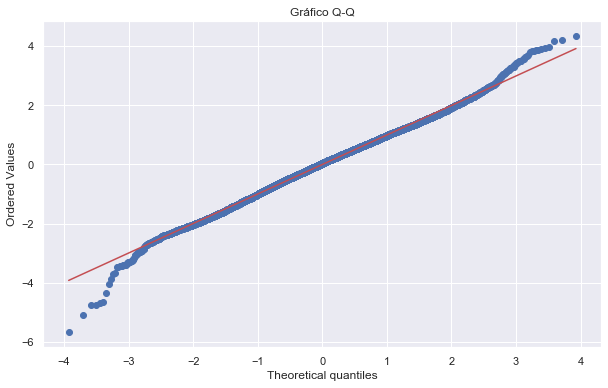

In [23]:
sct.probplot(false_pulsar_mean_profile_standardized, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

Podemos observar que a maioria da distribuição está concentrada em torno da reta, portanto a amostra analisada se assemelha com a normal. Porém, com a ocorrência de valores extremos nas caudas, mais precisamente a partir de 3 desvios padrões de distância.

### Referências  
* [Codenation - Distribuições de Probabilidade](https://github.com/codenation-dev/Data-Science-Online/blob/master/Semana%204/aula_4_distribuicoes_de_probabilidade.ipynb)
* [Estatística Prática para Cientistas de Dados](https://www.amazon.com.br/dp/B07Y42K8ZX/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1)  
* [QA Stack - QQ Plot](https://qastack.com.br/stats/101274/how-to-interpret-a-qq-plot)